In [54]:
from datetime import datetime, timedelta
from dateutil import tz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from siphon.catalog import TDSCatalog

In [121]:
rap_catalog = ('https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/GFS_Global_0p25deg_20200531_1200.grib2/catalog.html?dataset=grib/NCEP/GFS/Global_0p25deg/GFS_Global_0p25deg_20200531_1200.grib2')

In [122]:
cat = TDSCatalog(rap_catalog)

In [123]:
cat.datasets

['GFS_Global_0p25deg_20200531_1200.grib2']

In [124]:
ncss = cat.datasets[0].subset()

In [125]:
ncss.variables

{'5-Wave_Geopotential_Height_isobaric',
 'Absolute_vorticity_isobaric',
 'Albedo_surface_Mixed_intervals_Average',
 'Apparent_temperature_height_above_ground',
 'Best_4_layer_Lifted_Index_surface',
 'Categorical_Freezing_Rain_surface',
 'Categorical_Freezing_Rain_surface_Mixed_intervals_Average',
 'Categorical_Ice_Pellets_surface',
 'Categorical_Ice_Pellets_surface_Mixed_intervals_Average',
 'Categorical_Rain_surface',
 'Categorical_Rain_surface_Mixed_intervals_Average',
 'Categorical_Snow_surface',
 'Categorical_Snow_surface_Mixed_intervals_Average',
 'Cloud_Work_Function_entire_atmosphere_single_layer_Mixed_intervals_Average',
 'Cloud_mixing_ratio_hybrid',
 'Cloud_mixing_ratio_isobaric',
 'Cloud_water_entire_atmosphere_single_layer',
 'Composite_reflectivity_entire_atmosphere',
 'Convective_Precipitation_Rate_surface_Mixed_intervals_Average',
 'Convective_available_potential_energy_pressure_difference_layer',
 'Convective_available_potential_energy_surface',
 'Convective_inhibition_p

In [126]:
point_query = ncss.query()
point_query.time_range(datetime.utcnow(), datetime.utcnow() + timedelta(hours=72))
point_query.accept('csv')
point_query.variables('Precipitable_water_entire_atmosphere_single_layer', 'Convective_available_potential_energy_surface')
point_query.lonlat_point(-82.32, 29.65)

var=Convective_available_potential_energy_surface&var=Precipitable_water_entire_atmosphere_single_layer&time_start=2020-05-31T19%3A24%3A13.967702&time_end=2020-06-03T19%3A24%3A13.967702&longitude=-82.32&latitude=29.65&accept=csv

In [127]:
point_data = ncss.get_data(point_query)

In [128]:
point_data

{'time': array([b'2020-05-31T21:00:00Z', b'2020-06-01T00:00:00Z',
        b'2020-06-01T03:00:00Z', b'2020-06-01T06:00:00Z',
        b'2020-06-01T09:00:00Z', b'2020-06-01T12:00:00Z',
        b'2020-06-01T15:00:00Z', b'2020-06-01T18:00:00Z',
        b'2020-06-01T21:00:00Z', b'2020-06-02T00:00:00Z',
        b'2020-06-02T03:00:00Z', b'2020-06-02T06:00:00Z',
        b'2020-06-02T09:00:00Z', b'2020-06-02T12:00:00Z',
        b'2020-06-02T15:00:00Z', b'2020-06-02T18:00:00Z',
        b'2020-06-02T21:00:00Z', b'2020-06-03T00:00:00Z',
        b'2020-06-03T03:00:00Z', b'2020-06-03T06:00:00Z',
        b'2020-06-03T09:00:00Z', b'2020-06-03T12:00:00Z',
        b'2020-06-03T15:00:00Z', b'2020-06-03T18:00:00Z'], dtype='|S20'),
 'latitude': array([29.65, 29.65, 29.65, 29.65, 29.65, 29.65, 29.65, 29.65, 29.65,
        29.65, 29.65, 29.65, 29.65, 29.65, 29.65, 29.65, 29.65, 29.65,
        29.65, 29.65, 29.65, 29.65, 29.65, 29.65]),
 'longitude': array([-82.32, -82.32, -82.32, -82.32, -82.32, -82.32, -82.3

In [129]:
df = pd.DataFrame(point_data)

In [135]:
hours = np.arange(len(df)) * 3

In [136]:
starting_time = df['time'][0].decode("utf-8") 

def convert_datetime(string):
    from_zone = tz.gettz('UTC')
    to_zone = tz.gettz('America/New York')
    utc_time = datetime.strptime(string, '%Y-%m-%dT%H:%M:%SZ').replace(tzinfo=from_zone)
    eastern = utc_time.astimezone(to_zone)
    date_time = datetime.strftime(eastern, '%a, %b %d, %Y %I:%M %p').lstrip('0').replace(' 0', ' ')
    return date_time

starting_time = convert_datetime(starting_time)

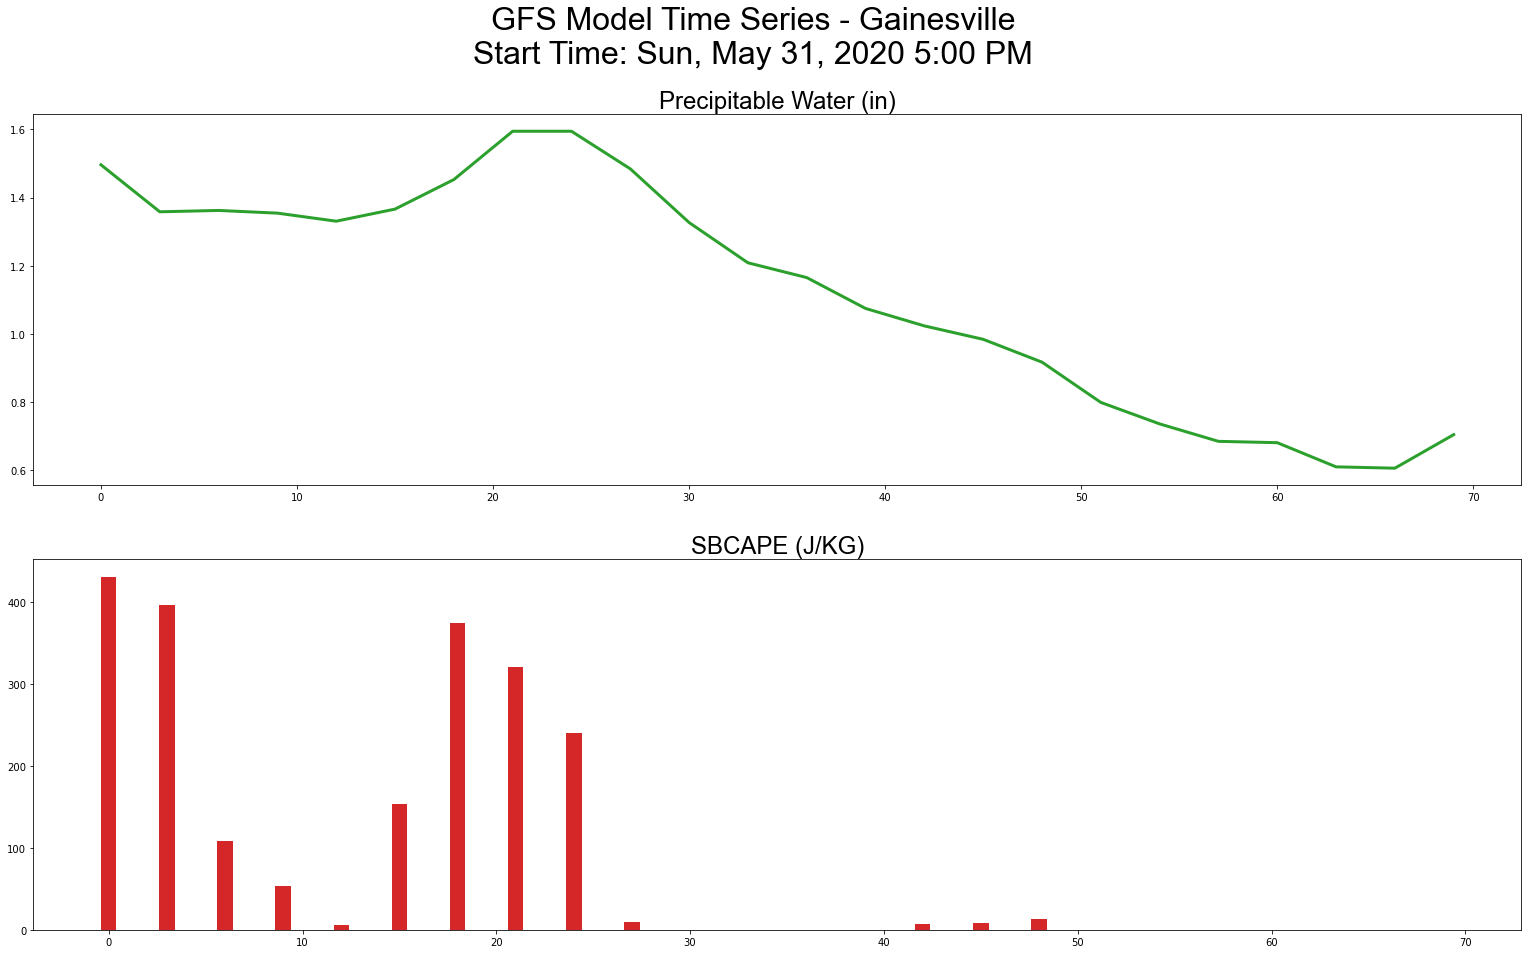

In [142]:
fig, axes = plt.subplots(figsize=(1920/72, 1080/72), nrows=2, ncols=1)
fig.suptitle(f"GFS Model Time Series - Gainesville\nStart Time: {starting_time}", fontsize=32, fontname='Arial')
# ax1 = fig.add_subplot(221)
# ax2 = fig.add_subplot(222)
# ax3 = fig.add_subplot(223)
# ax4 = fig.add_subplot(224)

axes[0].plot(hours, df['Precipitable_water_entire_atmosphere_single_layer'] / 25.4, color='tab:green', linewidth=3)
axes[1].bar(hours, df['Convective_available_potential_energy_surface'], color='tab:red')
# ax3.bar(hours, df['Visibility_surface']/1609, color='tab:blue')
# ax4.bar(hours, df['Lightning_entire_atmosphere'], color='tab:orange')


axes[0].set_title('Precipitable Water (in)', fontsize=24, fontname='Arial')
axes[1].set_title('SBCAPE (J/KG)', fontsize=24, fontname='Arial')
# ax3.set_title('Visibility (mi)', fontsize=24, fontname='Arial')
# ax4.set_title('Lightning Density (flashes / km^2 / 5 min)', fontsize=24, fontname='Arial')
# ax4.set_ylim([0, 1])

plt.savefig('gfs_timeseries.png', dpi=72)